

---


# 1- Importing The Packages


---




In [5]:
#Needed packages
import os
import random
import seaborn as sns
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt



---


# 2 - Dataset Analytics (statistics and distributions)

---


Operating on the original dataset without dropping the class label, just to give insight about the dataset.

**Step 1:** Upload HAM10000_metadata.csv file to colab's files



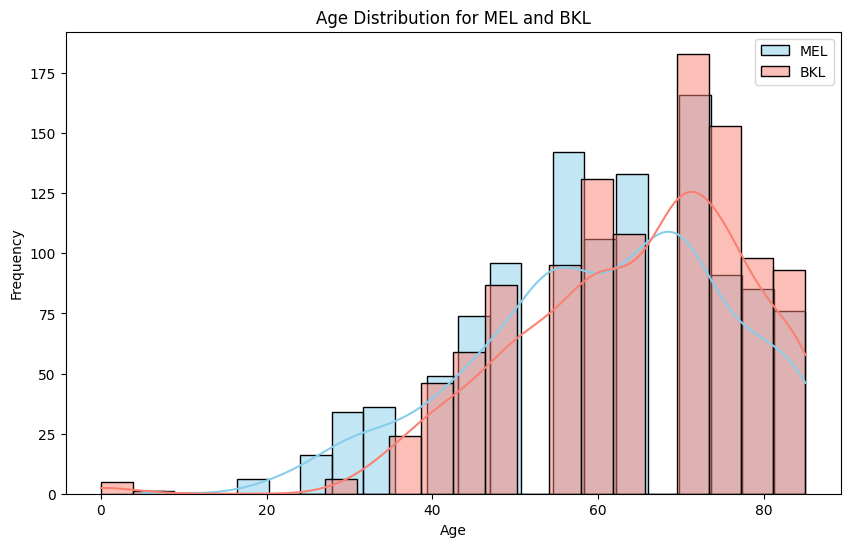

In [6]:
#Age
metadata_insights = pd.read_csv('/content/HAM10000_metadata.csv', engine='python')

mel_data = metadata_insights[metadata_insights['dx'] == 'mel']
bkl_data = metadata_insights[metadata_insights['dx'] == 'bkl']

plt.figure(figsize=(10, 6))
sns.histplot(mel_data['age'], label='MEL', kde=True, color='skyblue')
sns.histplot(bkl_data['age'], label='BKL', kde=True, color='salmon')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution for MEL and BKL')
plt.legend()
plt.show()


**Age Distribution for MEL and BKL**

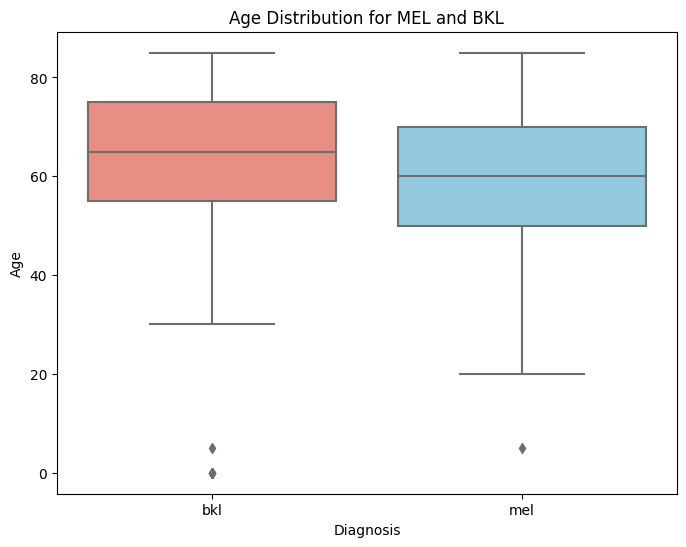

In [ ]:
plt.figure(figsize=(8, 6))

mel_bkl_data = metadata_insights[metadata_insights['dx'].isin(['mel', 'bkl'])]

# Specify custom colors for the boxplot
custom_palette = {'mel': 'skyblue', 'bkl': 'salmon'}

sns.boxplot(x='dx', y='age', data=mel_bkl_data, palette=custom_palette)
plt.xlabel('Diagnosis')
plt.ylabel('Age')
plt.title('Age Distribution for MEL and BKL')
plt.show()


#The age connection with gender for Melanoma cases
https://scmsjournal.com/wp-content/uploads/2016/02/vol29_i4-Epidemiology.pdf

Age (0-40) and Female => Melanoma Age (+40) and Male => Melanoma

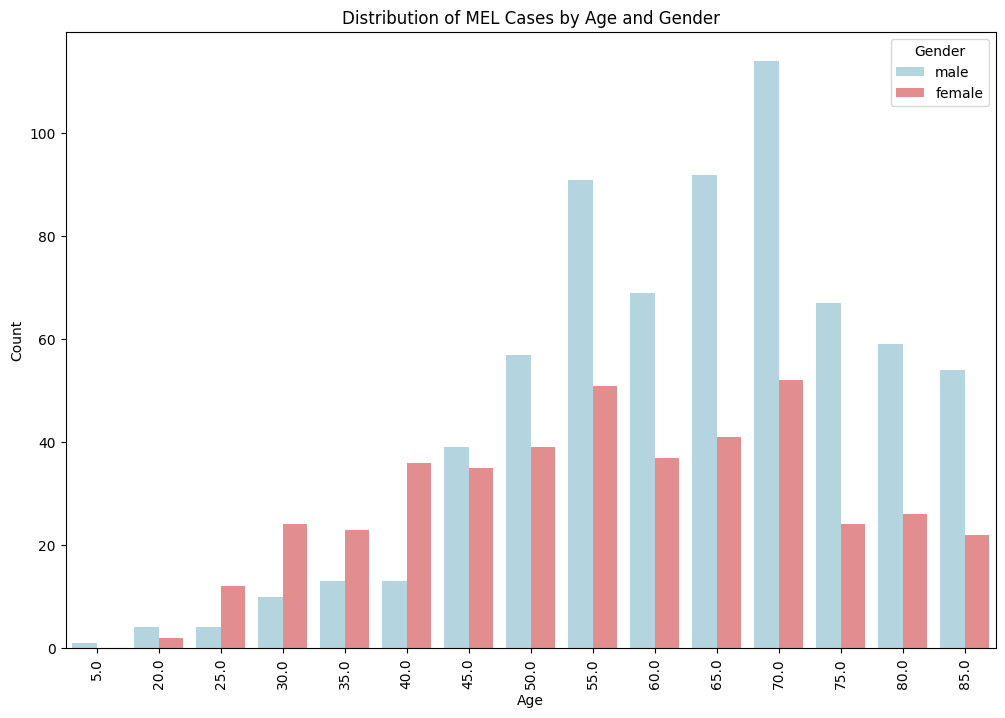

In [ ]:
mel_data = metadata_insights[metadata_insights['dx'] == 'mel']


custom_palette = {'male': 'lightblue', 'female': 'lightcoral'}

# Create a grouped bar chart to visualize the distribution of MEL cases by age and gender
plt.figure(figsize=(12, 8))
sns.countplot(x='age', hue='sex', data=mel_data, palette=custom_palette, hue_order=['male', 'female'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of MEL Cases by Age and Gender')
plt.legend(title='Gender')
plt.xticks(rotation=90)
plt.show()


#The gender and localiztion (trunk)
https://pubmed.ncbi.nlm.nih.gov/32645881/
/
Anatomic localization of melanoma differs between genders: it's more common on the trunk in men and on the lower limbs in women.

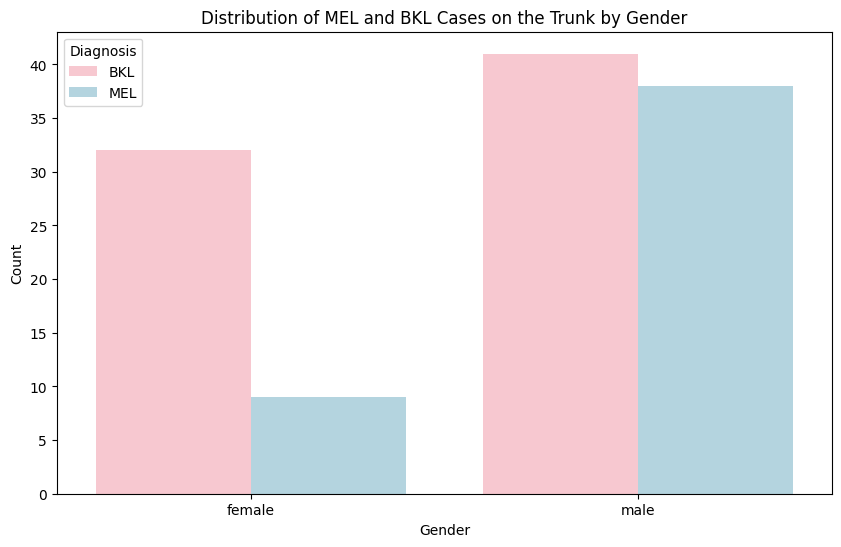

In [8]:
#Sex and trunk
# Filter the data for cases on the trunk with MEL or BKL diagnosis
trunk_data = metadata_insights[(metadata_insights['localization'] == 'trunk') & metadata_insights['dx'].isin(['mel', 'bkl'])]

# Create a grouped bar chart to visualize the distribution of MEL and BKL cases on the trunk by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='dx', data=trunk_data)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of MEL and BKL Cases on the Trunk by Gender')
plt.legend(title='Diagnosis', labels=['BKL', 'MEL'])
plt.show()

#Localization Distribution for MEL and BKL for both gender

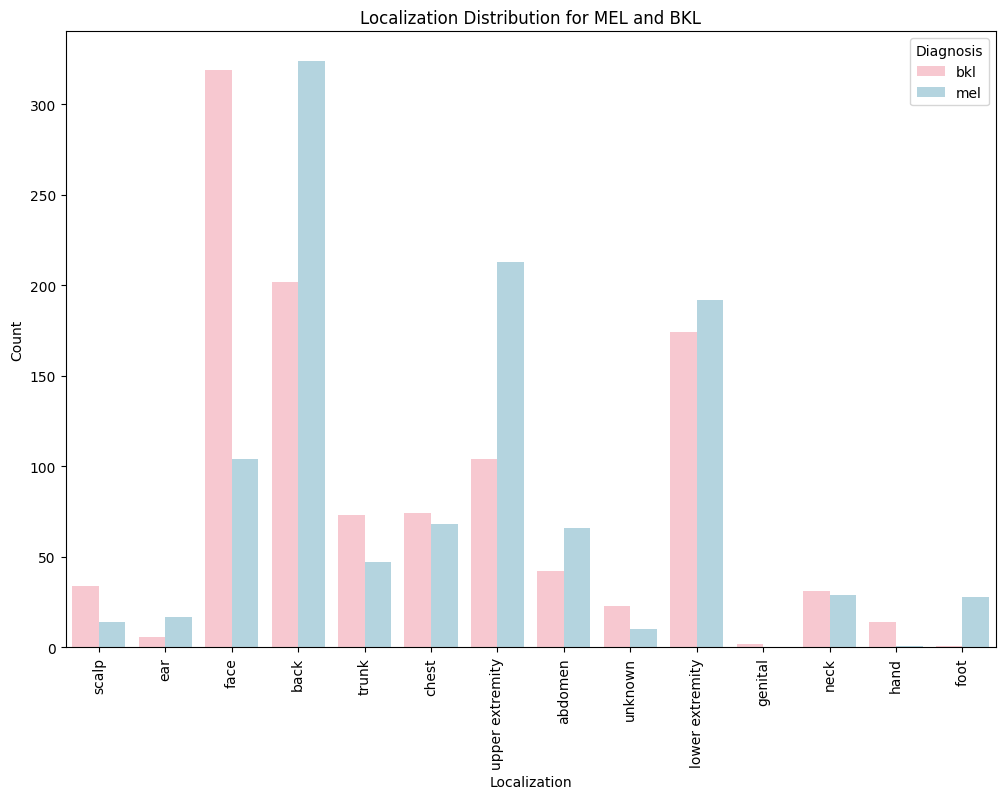

In [10]:
#Localization
plt.figure(figsize=(12, 8))
mel_bkl_data = metadata_insights[metadata_insights['dx'].isin(['mel', 'bkl'])]

sns.countplot(x='localization', hue='dx', data=mel_bkl_data)
plt.xlabel('Localization')
plt.ylabel('Count')
plt.title('Localization Distribution for MEL and BKL')
plt.xticks(rotation=90)
plt.legend(title='Diagnosis')
plt.show()

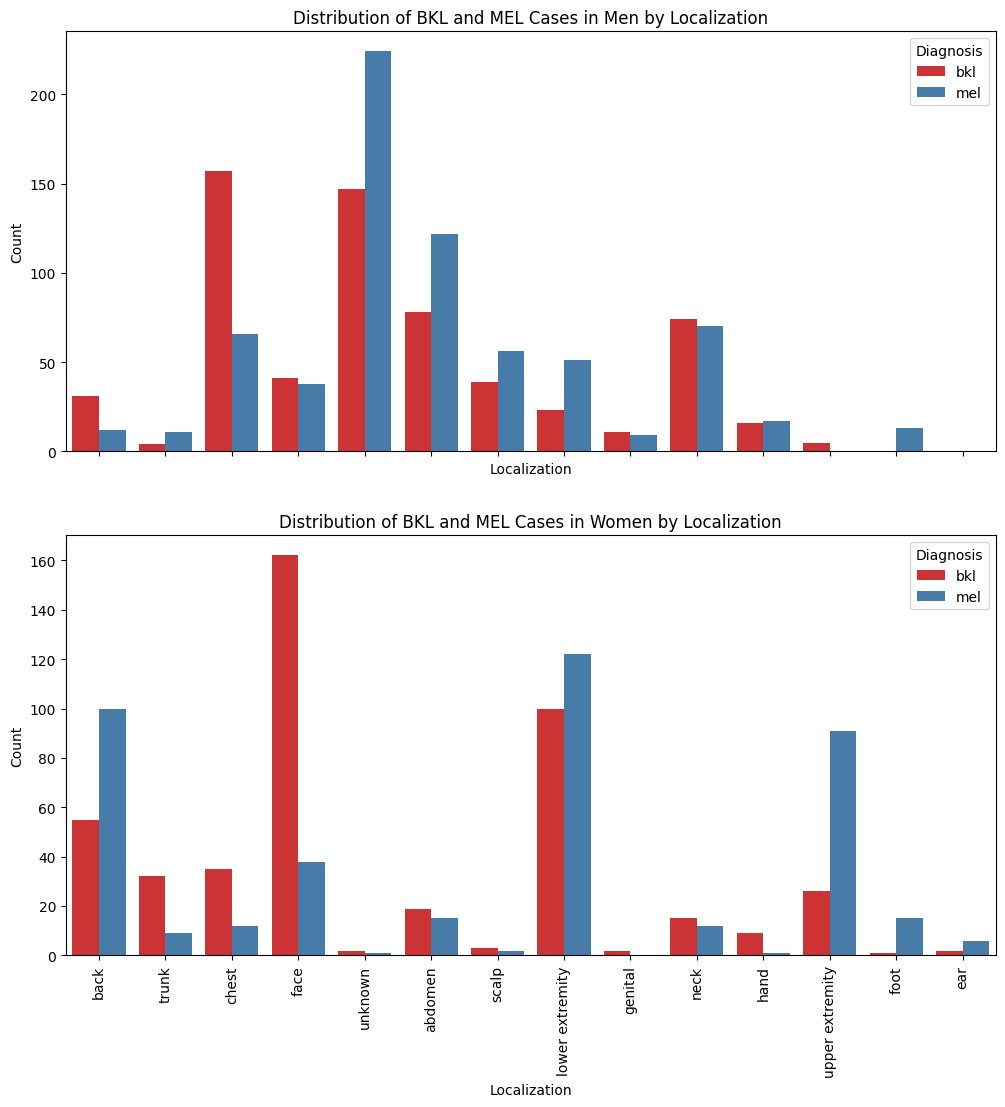

In [11]:

# Assuming you have already loaded the data into metadata_insights
bkl_mel_data = metadata_insights[metadata_insights['dx'].isin(['bkl', 'mel'])]

# Separate data for men and women
men_data = bkl_mel_data[bkl_mel_data['sex'] == 'male']
women_data = bkl_mel_data[bkl_mel_data['sex'] == 'female']

# Create separate plots for men and women
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Plot for men
sns.countplot(x='localization', hue='dx', data=men_data, hue_order=['bkl', 'mel'], palette='Set1', ax=axes[0])
axes[0].set_xlabel('Localization')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of BKL and MEL Cases in Men by Localization')
axes[0].legend(title='Diagnosis')

# Plot for women
sns.countplot(x='localization', hue='dx', data=women_data, hue_order=['bkl', 'mel'], palette='Set1', ax=axes[1])
axes[1].set_xlabel('Localization')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of BKL and MEL Cases in Women by Localization')
axes[1].legend(title='Diagnosis')

plt.xticks(rotation=90)
plt.show()

# End of Metadata Visualization and Extracting Facts